In [1]:
import pandas as pd
import sklearn 
#as scikit_learn
import scipy
import altair as alt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import preprocessing
from sklearn.metrics import f1_score
#from jupyter_datatables import init_datatables_mode
#init_datatables_mode()

In [2]:
#source filename for premier league
#train_data
#train_source_filename = 'E0_1819.csv'
#test data
#test_source_filename = 'E0.csv'

#source file path
#fileName = 'GraphSage_embeddings - Sheet1'
#fileName = 'GraphSage_embeddings - TX_OUT_labels_PR_Feature_TSNE'
#fileName = '20210312_GraphSAGE_embed_features'
#fileName = '20210313_GraphSAGE_embed_features'
#fileName = '20210313a_GraphSAGE_embed_features'
fileName = '20210313b_GraphSAGE_embed_features'
#fileName = '20210313_fastRPExtended_embed_features'
#file_path = '/Users/adamturner/Documents/MPICT/Research/9_PhD/Chapters/Chapter_5/data/WY/12t9YDPgwueZ9NyMgw519p7AA8isjr6SMw_txs_outs_210302.json'
#file_path = '/Users/adamturner/Documents/MPICT/Research/9_PhD/Chapters/Chapter_5/data/WY/12t9YDPgwueZ9NyMgw519p7AA8isjr6SMw_txs_outs_210302.json'


In [3]:
d = pd.read_csv('/Users/adamturner/Documents/MPICT/Research/9_PhD/Chapters/Chapter_8/'+fileName+'.csv')
#d.columns = ['btc_id', 'pageRank', 'embedding']
#d = d.set_index("btc_id")
nd = d['features'].str.strip('[]').str.split(',').apply(pd.Series)
#nd['pageRank'] = d['pageRank']
X=nd
#X=d
#print(d.head())
#print(X.embedding)

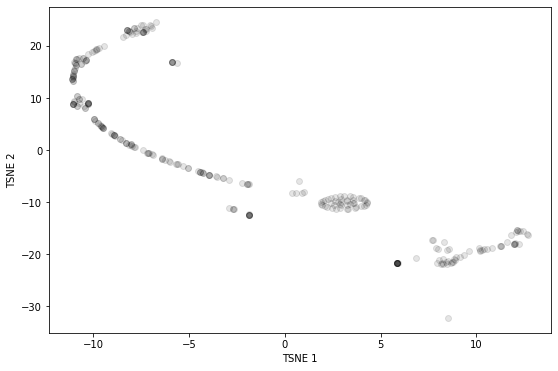

In [4]:
#TSNE
X_embedded = TSNE(n_components=2, random_state=6).fit_transform(X)
#X_embedded = TSNE(n_components=2, random_state=6).fit_transform(list(X.embedding))
TSNE_components = pd.DataFrame(X_embedded, columns=['X_red_X', 'X_red_Y'])
#TSNE_components = TSNE_components.assign(X_red_X=X_embedded[:,0], X_red_Y=X_embedded[:,1])
TSNE_components['btc_id']=d['name']
TSNE_components['risk_rating']=d['exp']
TSNE_components['pageRank']=d['pr']
TSNE_components['out_deg']=d['outdeg']
TSNE_components['in_deg']=d['indeg']
TSNE_components['total_amount']=d['ta']

#Plot the TSNE to determine if there are any clear clusters
plt.figure(figsize=(9 ,6))
plt.scatter(TSNE_components['X_red_X'], TSNE_components['X_red_Y'], alpha=.1, color='black')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.show()

#print(X_embedded)
#print(d['btc_id'])
#print(TSNE_components.head())

In [5]:

print(TSNE_components.head())

     X_red_X    X_red_Y                                             btc_id  \
0   8.576049 -19.075012  3332d270983f3183af866714b8eb4ad226f4f4bea2ce42...   
1   8.074256 -21.150051                 1CZH527GEeR5WDyGac5WHrD6tnW5qJkFGR   
2  10.800502 -18.715309                 1P2SbiV5zKAwMTZH1VdExXM2sXRjkCeTsx   
3   8.262970 -20.877209                 19JCSFRPyXnVn7ptXyqmhLKNBAmPcksZS6   
4  12.165103 -15.491117  6fc639ba056de897d32c26cc2f5a917dfb38256eef5e92...   

   risk_rating  pageRank  out_deg  in_deg  total_amount  
0     0.108562  1.095922        2       4     15.850084  
1     0.007523  0.615766        2       1      2.196746  
2     0.336156  1.309937        4       4     36.809101  
3     0.004096  0.150000        1       0      3.588327  
4     0.007299  1.187965        1       7      0.799231  


In [6]:
alt.Chart(TSNE_components).mark_circle(size=60).encode(
    x='X_red_X',
    y='X_red_Y',
    size='pageRank',
    color='risk_rating',
    tooltip=['btc_id', 'total_amount', 'out_deg', 'in_deg', 'risk_rating']
).interactive()

alt.Chart(...)

In [7]:
alt.Chart(TSNE_components).mark_bar().encode(
    alt.X("X_red_X", bin=True),
    y='count()',
).interactive()
#alt.Bin(extent=[0,1], step=0.05)
#sns.displot(TSNE_components, x="risk_rating")
#plt.show()

alt.Chart(...)

(7.0, 0.0)

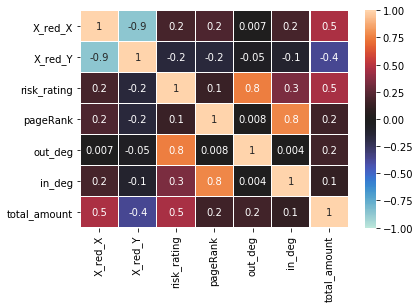

In [8]:
#Using the correlation/heatmap method
corr = TSNE_components.corr()
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0)
ax = sns.heatmap(corr, annot = True, fmt='.1g', linewidths=.2, vmin=-1, vmax=1, center= 0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#plt.xticks(range(TSNE_components.select_dtypes(['number']).shape[1]), TSNE_components.select_dtypes(['number']).columns, fontsize=6)#, rotation=45)
#plt.yticks(range(TSNE_components.select_dtypes(['number']).shape[1]), TSNE_components.select_dtypes(['number']).columns, fontsize=6)
#plt.figure(figsize=(19, 15))
#plt.show()


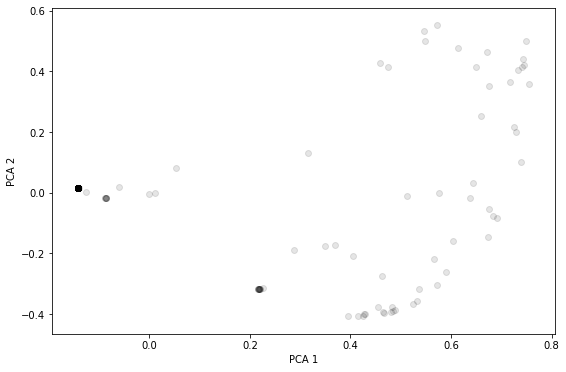

    X_red_X   X_red_Y                                             btc_id  \
0  0.604054 -0.159951  3332d270983f3183af866714b8eb4ad226f4f4bea2ce42...   
1  0.455689 -0.377412                 1CZH527GEeR5WDyGac5WHrD6tnW5qJkFGR   
2  0.739921  0.102155                 1P2SbiV5zKAwMTZH1VdExXM2sXRjkCeTsx   
3  0.482346 -0.377370                 19JCSFRPyXnVn7ptXyqmhLKNBAmPcksZS6   
4  0.546105  0.533745  6fc639ba056de897d32c26cc2f5a917dfb38256eef5e92...   

   risk_rating  pageRank  out_deg  in_deg  total_amount  
0     0.108562  1.095922        2       4     15.850084  
1     0.007523  0.615766        2       1      2.196746  
2     0.336156  1.309937        4       4     36.809101  
3     0.004096  0.150000        1       0      3.588327  
4     0.007299  1.187965        1       7      0.799231  


In [9]:

#Reduce the components to 2
pca = PCA(n_components=2)

X_red = pca.fit_transform(X)

# Save components to a DataFrame
PCA_components = pd.DataFrame(X_red, columns=['X_red_X', 'X_red_Y'])
PCA_components['btc_id']=d['name']
PCA_components['risk_rating']=d['exp']
PCA_components['pageRank']=d['pr']
PCA_components['out_deg']=d['outdeg']
PCA_components['in_deg']=d['indeg']
PCA_components['total_amount']=d['ta']

plt.figure(figsize=(9 ,6))
#Plot the PCA to determine if there are any clear clusters
plt.scatter(PCA_components['X_red_X'], PCA_components['X_red_Y'], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()
print(PCA_components.head())

In [10]:
alt.Chart(PCA_components).mark_circle(size=60).encode(
    x='X_red_X',
    y='X_red_Y',
    size='pageRank',
    color=alt.Color('risk_rating', scale=alt.Scale(scheme='turbo')),
    tooltip=['btc_id', 'total_amount', 'out_deg', 'in_deg', 'risk_rating']
).interactive()

alt.Chart(...)

(7.0, 0.0)

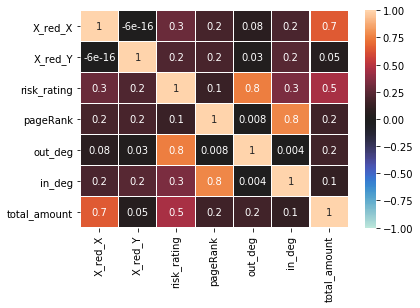

In [11]:
corr = PCA_components.corr()
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0)
ax = sns.heatmap(corr, annot = True, fmt='.1g', linewidths=.2, vmin=-1, vmax=1, center= 0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#Using the correlation/heatmap method
#sns.heatmap(PCA_components.corr(),annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0)
#plt.xticks(range(PCA_components.select_dtypes(['number']).shape[1]), PCA_components.select_dtypes(['number']).columns, fontsize=6)#, rotation=45)
#plt.yticks(range(PCA_components.select_dtypes(['number']).shape[1]), PCA_components.select_dtypes(['number']).columns, fontsize=6)
#plt.show()

In [12]:
alt.Chart(PCA_components).mark_bar().encode(
    alt.X("X_red_X", bin=True),
    y='count()',
).interactive()
#alt.Bin(extent=[0,1], step=0.05)
#sns.displot(TSNE_components, x="risk_rating")
#plt.show()

alt.Chart(...)

In [13]:
"""
Elbow Method
Determining the ideal number of clusters for our k-means model can be done by measuring
the sum of the squared distances to the nearest cluster center aka inertia.
"""

def elbow_fn(X_red):
    ks = range(1, 10)
    inertias = []
    for k in ks:
        # Create a KMeans instance with k clusters: model
        model = KMeans(n_clusters=k)
        
        # Fit model to samples
        model.fit(X_red)
        
        # Append the inertia to the list of inertias
        inertias.append(model.inertia_)
        
    plt.plot(ks, inertias, '-o', color='black')
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()
    return



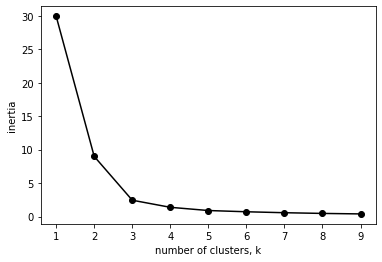

In [14]:
#Run Elbow function to determine the number of clusters (K) for analysis 
#using the PCA fit
elbow_fn(X_red)
#using the TSNE fit
#elbow_fn(X_embedded)

In [16]:
#Determine Kmeans clustering
K=3
#X_red - PCA
#X_embedded - TSNE
kmeans = KMeans(n_clusters=K, random_state=0).fit(X_red)
#Cluster labels
lab = kmeans.labels_

#print("*****Cluster Centers*****")
#print(kmeans.cluster_centers_)
centers = kmeans.cluster_centers_


In [17]:
#output routine 

d2 = d.assign(X_red_X=X_red[:,0], X_red_Y=X_red[:,1], cluster_label=lab)
#d3 = d2.assign(X_red_Y=X_red[:,1])
#print("D2")
#print(d2)
#Output analysis data set to CSV
print(d2.head())
#d2.to_csv("/Users/adamturner/Documents/MPICT/Research/9_PhD/Chapters/Chapter_8/"+fileName+"_output.csv")

                                                name       exp        pr  \
0  3332d270983f3183af866714b8eb4ad226f4f4bea2ce42...  0.108562  1.095922   
1                 1CZH527GEeR5WDyGac5WHrD6tnW5qJkFGR  0.007523  0.615766   
2                 1P2SbiV5zKAwMTZH1VdExXM2sXRjkCeTsx  0.336156  1.309937   
3                 19JCSFRPyXnVn7ptXyqmhLKNBAmPcksZS6  0.004096  0.150000   
4  6fc639ba056de897d32c26cc2f5a917dfb38256eef5e92...  0.007299  1.187965   

   outdeg  indeg         ta            ts  \
0       2      4  15.850084  1.501849e+12   
1       2      1   2.196746           NaN   
2       4      4  36.809101           NaN   
3       1      0   3.588327           NaN   
4       1      7   0.799231  1.501909e+12   

                                            features   X_red_X   X_red_Y  \
0  [-0.0012814513024644576,-0.0008252647734417126...  0.604054 -0.159951   
1  [-0.00038264079266582405,-0.001462007215926095...  0.455689 -0.377412   
2  [-0.0017040077779393926,-0.00091425999059

In [18]:
#KMEANS CLUSTER PLOT
alt.Chart(d2).mark_circle(size=60).encode(
    x='X_red_X',
    y='X_red_Y',
    size='pageRank',
    color=alt.Color('cluster_label', scale=alt.Scale(scheme='turbo')),
    tooltip=['btc_id', 'total_amount', 'out_deg', 'in_deg', 'risk_rating']
).interactive()

ValueError: pageRank encoding field is specified without a type; the type cannot be inferred because it does not match any column in the data.

(9.0, 0.0)

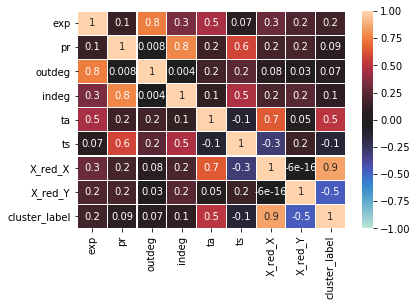

In [19]:
corr = d2.corr()
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0)
ax = sns.heatmap(corr, annot = True, fmt='.1g', linewidths=.2, vmin=-1, vmax=1, center= 0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [19]:
print(X_red)

[[ 6.04053717e-01 -1.59951360e-01]
 [ 4.55689062e-01 -3.77411915e-01]
 [ 7.39920687e-01  1.02154603e-01]
 [ 4.82345523e-01 -3.77369998e-01]
 [ 5.46104766e-01  5.33745346e-01]
 [-8.52107517e-02 -1.67198986e-02]
 [-5.97029117e-02  1.88369412e-02]
 [-8.66322132e-02 -1.69570437e-02]
 [-8.56541928e-02 -1.67943328e-02]
 [-8.80685942e-02 -1.72477144e-02]
 [-8.51670153e-02 -1.67121100e-02]
 [-8.79228293e-02 -1.72169211e-02]
 [ 6.58982989e-01  2.53369676e-01]
 [ 6.43463722e-01  3.14697173e-02]
 [ 7.25940730e-01  2.16001792e-01]
 [ 6.74620212e-01 -5.46954633e-02]
 [ 5.36074783e-01 -3.16326126e-01]
 [ 3.94913412e-01 -4.04226806e-01]
 [ 5.13296449e-01 -1.19538637e-02]
 [ 4.85145659e-01 -3.89018613e-01]
 [ 5.24969490e-01 -3.66820282e-01]
 [ 4.67368590e-01 -3.94591710e-01]
 [ 4.88911525e-01 -3.84851954e-01]
 [ 4.28128597e-01 -4.00603414e-01]
 [ 2.88378808e-01 -1.87644898e-01]
 [ 4.62455205e-01 -2.75740085e-01]
 [-1.25980723e-01  2.91690537e-03]
 [ 7.17710766e-01  3.65361568e-01]
 [ 4.04758674e-01 -2

  font = self._get_font(prop)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/textpath.py", line 38, in _get_font
    fname = font_manager.findfont(prop)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py", line 1238, in findfont
    rc_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py", line 1271, in _findfont_cached
    _log.debug('findfont: score(%s) = %s', font, score)
Message: 'findfont: score(%s) = %s'
Arguments: (<Font 'LiHei Pro' (儷黑 Pro.ttf) normal normal 400 normal>, 10.05)
--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/logging/__init__.py", line 989, in emit
    stream.write(msg)
UnicodeEncodeError: 'ascii' codec can't encode characters in position 120-123: ordinal not in range(128)
Call stack:
  File "/Library/Fram

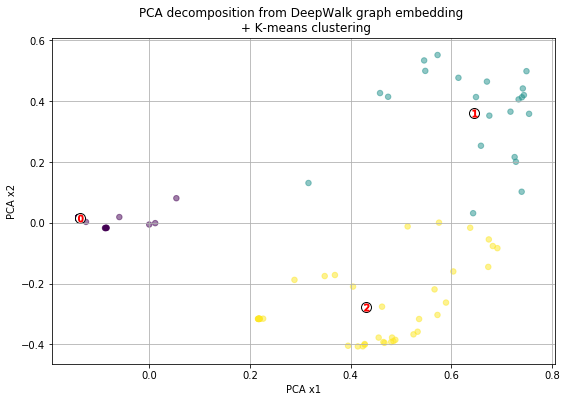

In [14]:
#plt.subplot(122, title='PCA decomposition from DeepWalk graph embedding \n + K-means clustering')
plt.figure(figsize=(9 ,6))
plt.scatter(X_red[:,0], X_red[:,1], c=lab, s=30, alpha=0.5)

plt.xlabel("PCA x1")
plt.ylabel("PCA x2")
plt.title("PCA decomposition from DeepWalk graph embedding \n + K-means clustering")
plt.rc('font', size=8)
#plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=100, edgecolor='k')
for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker='$%d$' % i, s=50, alpha=1, edgecolor='r')

plt.grid()
plt.show()

In [23]:
#df = pd.DataFrame(np.random.randn(100, 2))
msk = np.random.rand(len(d2)) < 0.8
train = d2[msk]
test = d2[~msk]
print(len(test))
print(len(train))
print(test.head(3))
#print(type(train))

#print("**['features']**")
#print(train['features'])
#print("**[['features']]**")
#print(train[['features']].values)
#x_train = train[['features']].values
#x_train_x = x_train.astype(float)


le = preprocessing.LabelEncoder()
train['features'] = le.fit_transform(train['features'])
train['cluster_label'] = le.fit_transform(train['cluster_label'])

test['features'] = le.fit_transform(test['features'])
test['cluster_label'] = le.fit_transform(test['cluster_label'])
#x_train = train.iloc[:, 7].values
#x_train = train.iloc[:, 7].values
#x_train = x_train.reshape(-1,1)
#x_train_df =  pd.DataFrame(x_train)
#x_train_df[0] = x_train_df['features']
#y_train = train.iloc[:, 10].values
#y_train = y_train.reshape(-1,1)
#print(x_train_x)
#print(x_train_df[0])
#y = dataset.iloc[:, 2].values
#x_train= train['features'].to_list()
#x_train= train['features'].reshape(-1, 1)
#x_train = x_train.reshape(-1, 1)

#y_train = train['cluster_label'].to_list()
#y_train = train['cluster_label'].reshape(-1, 1)
#y_train = y_train.reshape(-1, 1)

#x_test = test['features'].to_list()
#x_test = x_test.reshape(-1, 1)

#y_test = test['cluster_label'].to_list()
#y_test = y_test.reshape(-1, 1)
#train["features"]=pd.to_numeric(train["features"], downcast="float")
### Train the SGD classifier
log = MultiOutputClassifier(SGDClassifier(loss="log"), n_jobs=10)
#lb = preprocessing.LabelBinarizer()
#y_onehot = lb.fit_transform(y)
#clf.fit(X, y_onehot)
#log.fit(x_train.reshape(-1, 1), y_train)
log.fit(train[['features']], train[['cluster_label']])


# Calculate the f1 score on test data

print(f1_score(test[['cluster_label']], 
               log.predict(test[['features']]), average="micro"))
print("****Predicted Labels****")
#print(log.predict(test[['features']]))
#df_total["pred_lin_regr"] = clf.predict(Xtest) 
test['predicted_cluster_label'] = log.predict(test[['features']])
print(test[['name', 'exp', 'cluster_label','predicted_cluster_label']].head(20))
dx = test[['name', 'exp', 'cluster_label','predicted_cluster_label']]
dx.to_csv("/Users/adamturner/Documents/MPICT/Research/9_PhD/Chapters/Chapter_8/"+fileName+"_output_predictor_3.csv")

61
238
                                                 name       exp        pr  \
0   3332d270983f3183af866714b8eb4ad226f4f4bea2ce42...  0.108562  1.095922   
5                  1D5boWNu8ACKEE35XZrd2TYYhsNYxPPXtD  0.000096  0.150000   
15                 1A6ezvhzGmCqNmGTTzxphLkByuJfjbuwxr  0.078757  0.440591   

    outdeg  indeg         ta            ts  \
0        2      4  15.850084  1.501849e+12   
5        1      0   0.083820           NaN   
15       2      2  17.247706           NaN   

                                             features   X_red_X   X_red_Y  \
0   [-0.0012814513024644576,-0.0008252647734417126...  0.604054 -0.159951   
5   [-0.00030683189678453186,-0.000775510079962743... -0.085211 -0.016720   
15  [-0.0012681982480045027,-0.0009706330624149666...  0.674620 -0.054695   

    cluster_label  
0               2  
5               0  
15              2  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:19: Settin